<a href="https://colab.research.google.com/github/EmGrGit/FinalProject/blob/main/MachineLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


### Q. Define the problem domain

The data set show information about different lumps in the breast tissue. This is a medical domain due to this information.

### Q. Identify candidate questions for your machine learning project

In the breast cancer data set, the input will be id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, symmetry_mean, fractal_dimension_mean.
The output from ML is expected to be diagnosis.
The dignosis will help doctors to make more informed decision in the future when it comes to breast cancer diagnosis.

### Q. Generate a descriptive statistics report for the columns in your dataset

In [ ]:
import pandas as pd
datapath = 'https://raw.githubusercontent.com/a-forty-two/DFE5/main/breastcancer_data.csv'
data = pd.read_csv(datapath, header=0)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1138.0,1.523243e+07,8.965268e+07,8670.00000,92995.25000,93279.50000,906012.50000,9.113205e+08
radius_mean,1138.0,1.412729e+01,3.522499e+00,6.98100,11.70000,13.37000,15.78000,2.811000e+01
texture_mean,1138.0,1.928965e+01,4.299144e+00,9.71000,16.17000,18.84000,21.80000,3.928000e+01
perimeter_mean,1138.0,9.196903e+01,2.428829e+01,43.79000,75.17000,86.24000,104.10000,1.885000e+02
area_mean,1138.0,6.548891e+02,3.517593e+02,143.50000,420.30000,551.10000,782.70000,2.501000e+03
smoothness_mean,1138.0,9.636028e-02,1.405794e-02,0.05263,0.08637,0.09587,0.10530,1.634000e-01
compactness_mean,1138.0,1.043410e-01,5.278953e-02,0.01938,0.06492,0.09263,0.13040,3.454000e-01
concavity_mean,1138.0,8.879932e-02,7.968474e-02,0.00000,0.02956,0.06154,0.13070,4.268000e-01
symmetry_mean,1138.0,1.811619e-01,2.740222e-02,0.10600,0.16190,0.17920,0.19570,3.040000e-01
fractal_dimension_mean,1138.0,6.279761e-02,7.057257e-03,0.04996,0.05770,0.06154,0.06612,9.744000e-02


In [ ]:
correlations = data.corr()
correlations

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,1.000000,0.052010,0.069534,0.050988,0.067529,-0.009038,0.000067,0.034903,-0.015412,-0.036598
radius_mean,0.052010,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.147741,-0.311631
texture_mean,0.069534,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.071401,-0.076437
perimeter_mean,0.050988,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.183027,-0.261477
area_mean,0.067529,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.151293,-0.283110
smoothness_mean,-0.009038,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.557775,0.584792
compactness_mean,0.000067,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.602641,0.565369
concavity_mean,0.034903,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.500667,0.336783
symmetry_mean,-0.015412,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,1.000000,0.479921
fractal_dimension_mean,-0.036598,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.479921,1.000000


In [ ]:
#Generate correlation heatmap, boxplot, and any other graphs

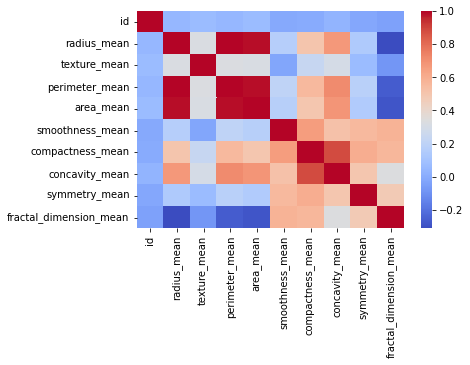

In [ ]:
import seaborn as sns
sns.heatmap(correlations, cmap='coolwarm')

In [ ]:
# in english not python- rationale why you choose to select or drop columns

In [ ]:
data = data.set_index("id")
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

The data could be missing during training, could be missing durtin production.
MCAR = missing in both. Hence, the column is not used.
MAR = available at training, but missing at production.
MNAR = missing during training, but available at production, which leads to removal of the missing values.
Not missing = don't worry about it.

As no values are missing, we don't have to worry about deleting any.

In [ ]:
# null values- first column wise, then row wise

If something would have needed to be deleted the code would have been: 

del data['name of the column to be delted']

data = data.dropna()

In [ ]:
# optional: normalize

Normalisation will be done after data split

In [ ]:
y = data.loc[:, ['diagnosis']]
x = data.iloc[:,1:]


In [ ]:
y.head

<bound method NDFrame.head of          diagnosis
id                
842302           M
842517           M
84300903         M
84348301         M
84358402         M
...            ...
93316            M
93317            M
93318            M
93319            M
93320            B

[1138 rows x 1 columns]>

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [ ]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
906878,13.66,19.13,89.46,575.3,0.09057,0.11470,0.09657,0.1848,0.06181
92998,13.20,17.43,84.13,541.6,0.07215,0.04524,0.04336,0.1487,0.05635
9111805,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.1663,0.05391
92896,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.1399,0.05688
869224,12.90,15.92,83.74,512.2,0.08677,0.09509,0.04894,0.1778,0.06235


In [ ]:
xtest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
905680,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.1852,0.05294
93136,13.28,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.1617,0.05594
92967,13.86,16.93,90.96,578.9,0.10260,0.15170,0.09901,0.2106,0.06916
9110720,11.99,24.89,77.61,441.3,0.10300,0.09218,0.05441,0.1820,0.06850
92774,15.34,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.2521,0.07032


In [ ]:
stats = xtrain.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
radius_mean,910.0,14.206767,3.573800,6.98100,11.74000,13.440000,16.125000,28.11000
texture_mean,910.0,19.363429,4.336548,9.71000,16.21000,18.900000,21.877500,39.28000
perimeter_mean,910.0,92.526154,24.643307,43.79000,75.27000,86.870000,106.200000,188.50000
area_mean,910.0,662.934176,357.446965,143.50000,421.47500,556.950000,804.600000,2501.00000
smoothness_mean,910.0,0.096435,0.014240,0.05263,0.08597,0.095890,0.105400,0.16340
compactness_mean,910.0,0.105379,0.053956,0.01938,0.06492,0.095090,0.130575,0.34540
concavity_mean,910.0,0.090138,0.080804,0.00000,0.02819,0.065925,0.134475,0.42680
symmetry_mean,910.0,0.181514,0.028203,0.10600,0.16190,0.179400,0.196400,0.30400
fractal_dimension_mean,910.0,0.062813,0.007198,0.04996,0.05769,0.061455,0.066143,0.09744


In [ ]:
xmean = stats['mean']
xstd = stats['std']

In [ ]:
xtrain_norm = (xtrain - xmean)/xstd
xtest_norm = (xtest - xmean)/xstd

In [ ]:
xtrain_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
906878,-0.152993,-0.053828,-0.124421,-0.245167,-0.411865,0.172748,0.079595,0.116514,-0.139324
92998,-0.281708,-0.445845,-0.340707,-0.339447,-1.705396,-1.114599,-0.578915,-1.163495,-0.897882
9111805,1.506305,1.299783,1.427318,1.477326,0.475068,-0.123605,0.932651,-0.539446,-1.236872
92896,-0.967253,-1.013117,-0.984696,-0.860643,-1.299499,-1.000617,-0.836948,-1.475520,-0.824249
869224,-0.365652,-0.794048,-0.356533,-0.421697,-0.678717,-0.190697,-0.509858,-0.131687,-0.064302


In [ ]:
ytrain.head()

,diagnosis
id,
906878,B
92998,B
9111805,M
92896,B
869224,B


In [ ]:
# in diagnosis the M and B need to be changed to prevent any problems in the model selection part

logic = { 'M': 1, 'B': 0}
ytrain_logic = ytrain['diagnosis'].map(lambda diag: logic[diag])
ytest_logic = ytest['diagnosis'].map(lambda diag: logic[diag])

In [ ]:
ytest_logic

id
905680     1
93136      0
92967      1
9110720    0
92774      1
          ..
8611555    1
85715      1
8611161    0
912600     0
896839     1
Name: diagnosis, Length: 228, dtype: int64

In [ ]:
# to normalise the data z-score is calculated
xmean = stats['mean']
xstd = stats['std']

xtrain_norm = (xtrain - xmean)/xstd
xtest_norm = (xtest - xmean)/xstd

In [ ]:
xtrain_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
906878,-0.152993,-0.053828,-0.124421,-0.245167,-0.411865,0.172748,0.079595,0.116514,-0.139324
92998,-0.281708,-0.445845,-0.340707,-0.339447,-1.705396,-1.114599,-0.578915,-1.163495,-0.897882
9111805,1.506305,1.299783,1.427318,1.477326,0.475068,-0.123605,0.932651,-0.539446,-1.236872
92896,-0.967253,-1.013117,-0.984696,-0.860643,-1.299499,-1.000617,-0.836948,-1.475520,-0.824249
869224,-0.365652,-0.794048,-0.356533,-0.421697,-0.678717,-0.190697,-0.509858,-0.131687,-0.064302


# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [ ]:

from sklearn.linear_model import SGDClassifier # gradient descent
from sklearn.svm import SVC, LinearSVC # graph
from sklearn.naive_bayes import GaussianNB # probability
from sklearn.tree import DecisionTreeClassifier # TREE based 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
allalgos = {"Stochastic Gradient Descend":SGDClassifier(),
            "Support Vector Machines": SVC(),
            "Linear SVM": LinearSVC(),
            "Gaussian Naive Bayes'": GaussianNB(),
            "Tree Tree": DecisionTreeClassifier(),
            "Jungle": RandomForestClassifier(),
            "KNN": KNeighborsClassifier()}

# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

Accuracy is the best statistical measure to evaluate the model built as the data has either yes or no, which is discrete = classification.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
all_accuracies = []
all_csv = []

for algoName, model in allalgos.items():
  print('*****')
  print(algoName)
  model.fit(xtrain, ytrain_logic)
  predictions = model.predict(xtest)
  accScore = accuracy_score(ytest_logic, predictions)
  cvScore = cross_val_score(model, xtrain, ytrain_logic, cv=5)
  all_accuracies.append([algoName,accScore])
  all_csv.append([algoName, cvScore])
  print(accScore)
  print(cvScore)

*****
Stochastic Gradient Descend
0.8421052631578947
[0.84065934 0.8021978  0.85714286 0.84065934 0.78571429]
*****
Support Vector Machines
0.881578947368421
[0.89010989 0.9010989  0.89010989 0.85714286 0.91758242]
*****
Linear SVM


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

0.7324561403508771
[0.83516484 0.8956044  0.80769231 0.79120879 0.85164835]
*****
Gaussian Naive Bayes'
0.8991228070175439
[0.92307692 0.92307692 0.92307692 0.89010989 0.93406593]
*****
Tree Tree
0.9824561403508771
[0.96703297 0.96703297 0.94505495 0.98351648 0.98351648]
*****
Jungle
0.9912280701754386
[0.99450549 0.97252747 0.97802198 0.95604396 0.98901099]
*****
KNN
0.9078947368421053
[0.8956044  0.91208791 0.8956044  0.89010989 0.9010989 ]


In [ ]:
all_accuracies

[['Stochastic Gradient Descend', 0.8421052631578947],
 ['Support Vector Machines', 0.881578947368421],
 ['Linear SVM', 0.7324561403508771],
 ["Gaussian Naive Bayes'", 0.8991228070175439],
 ['Tree Tree', 0.9824561403508771],
 ['Jungle', 0.9912280701754386],
 ['KNN', 0.9078947368421053]]

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [ ]:
import pickle
pickle.dump(model, open('breastcancermodel.pkl','wb'))

In [ ]:
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
# COMPUTE CODE

import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
}

body = str.encode(json.dumps(data))

url = 'http://eb49cc7d-231f-42fc-a12b-2900fa61e358.eastus2.azurecontainer.io/score'
api_key = '' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))